## Titanic Machine Learning from Disaster

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [5]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [15]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [16]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1 
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1 

In [17]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [18]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [19]:
family_map = {1: "Alone", 
              2: "Small", 
              3: "Small", 
              4: "Small", 
              5: "Medium", 
              6: "Medium", 
              7: "Large",
              8: "Large",
              11: "Large"}

train_df['Family_Size_Group'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Group'] = test_df['Family_Size'].map(family_map)

In [20]:
train_df.groupby(['Family_Size_Group'], as_index=False)['Survived'].mean()

,Family_Size_Group,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [21]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


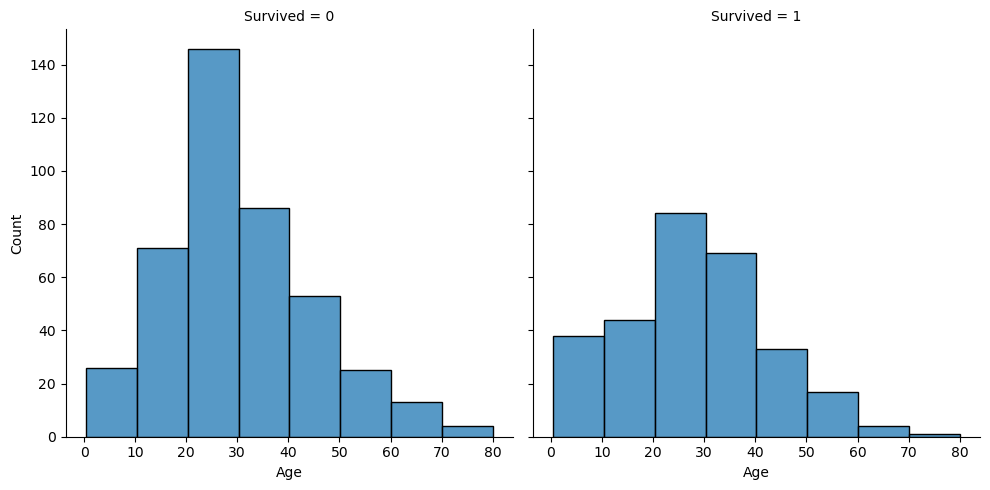

In [22]:
sns.displot(train_df, x="Age", col="Survived", binwidth=10, height=5)

In [23]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 8)

In [24]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

C:\Users\gusta\AppData\Local\Temp\ipykernel_41360\1587675067.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [26]:
train_df.loc[train_df["Age"] <= 16, 'Age'] = 0 
train_df.loc[(train_df["Age"] > 16) & (train_df["Age"] <= 20.125), 'Age'] = 1
train_df.loc[(train_df["Age"] > 20.125) & (train_df["Age"] <= 24), 'Age'] = 2
train_df.loc[(train_df["Age"] > 24) & (train_df["Age"] <= 28), 'Age'] = 3
train_df.loc[(train_df["Age"] > 28) & (train_df["Age"] <= 32.312), 'Age'] = 4
train_df.loc[(train_df["Age"] > 32.312) & (train_df["Age"] <= 38), 'Age'] = 5
train_df.loc[(train_df["Age"] > 38) & (train_df["Age"] <= 47), 'Age'] = 6
train_df.loc[(train_df["Age"] > 47) & (train_df["Age"] <= 80), 'Age'] = 7
train_df.loc[train_df["Age"] < 80, 'Age']




test_df.loc[test_df["Age"] <= 16, 'Age'] = 0 
test_df.loc[(test_df["Age"] > 16) & (test_df["Age"] <= 20.125), 'Age'] = 1
test_df.loc[(test_df["Age"] > 20.125) & (test_df["Age"] <= 24), 'Age'] = 2
test_df.loc[(test_df["Age"] > 24) & (test_df["Age"] <= 28), 'Age'] = 3
test_df.loc[(test_df["Age"] > 28) & (test_df["Age"] <= 32.312), 'Age'] = 4
test_df.loc[(test_df["Age"] > 32.312) & (test_df["Age"] <= 38), 'Age'] = 5
test_df.loc[(test_df["Age"] > 38) & (test_df["Age"] <= 47), 'Age'] = 6
test_df.loc[(test_df["Age"] > 47) & (test_df["Age"] <= 80), 'Age'] = 7
test_df.loc[test_df["Age"] < 80, 'Age']

0      5.0
1      6.0
2      7.0
3      3.0
4      2.0
      ... 
409    0.0
411    5.0
412    3.0
414    6.0
415    6.0
Name: Age, Length: 332, dtype: float64